In [1]:
# MOUNTING DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# IMPORTING LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# LOADING THE DATASET
heart=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Heart Disease With Pytorch/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# CHECKING THE NULL VALUE
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
# FINDING OUT THE CORRELATION OF EACH FEATURE
corr_matrix=heart.corr()

top_corr_features=corr_matrix.index

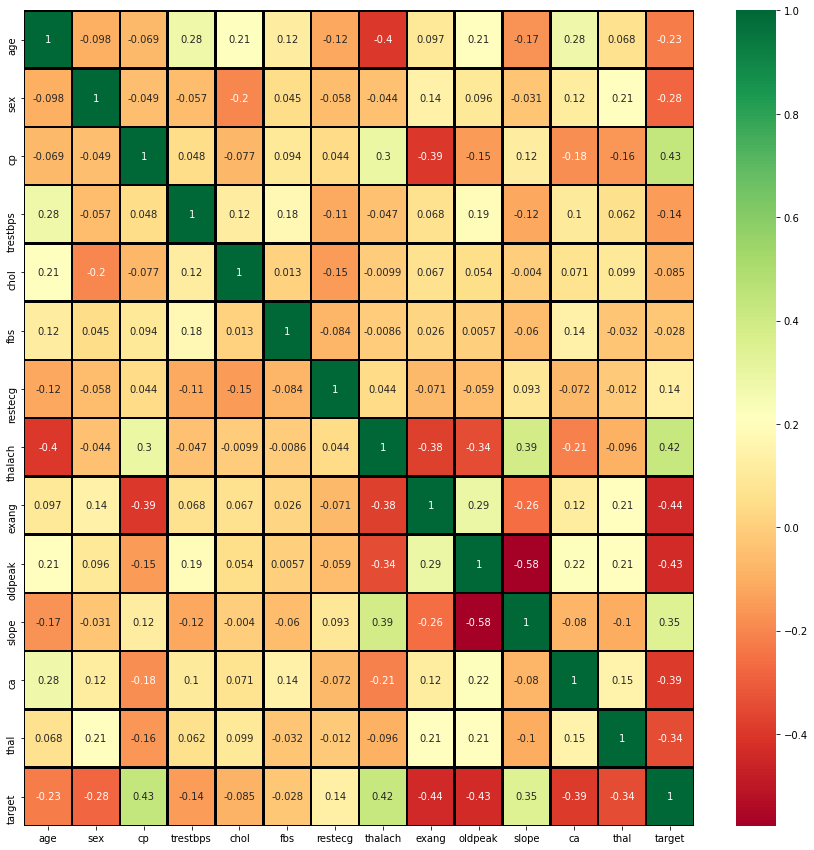

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(heart[top_corr_features].corr(),annot=True,cmap='RdYlGn',linewidths=1.5,linecolor='Black')

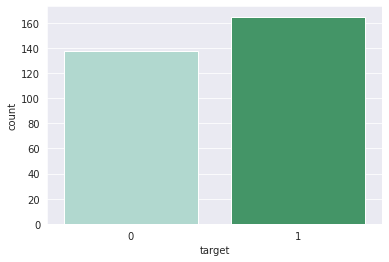

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='target',data=heart,palette='BuGn')

In [10]:
# APPLYING THE FEATURE SELECTION TECHINQUE
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
heart[columns_to_scale]=sc.fit_transform(heart[columns_to_scale])

In [11]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [12]:
# CREATING THE DUMMY COLUMMNS
heart=pd.get_dummies(heart,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
heart.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [13]:
heart.shape

(303, 31)

In [38]:
# SETTING UP THE TAGERT COLUMN AND FEATURE COLUMN
X = heart.drop(['target'], axis=1).values
y = heart['target'].values

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
# IMPORTING THE PY-TORCH LIBRARY
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable

In [41]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# LONG TENSOR DOESNOT CONVERTS IT INTO FLOATING POINT 
y_train = torch.LongTensor(y_train) 
y_test = torch.LongTensor(y_test)

In [42]:
# CREATING THE FUNCTION
class Net(nn.Module):
    def __init__(self, in_count, output_count):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_count, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, output_count)
        self.softmax = nn.Softmax()
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return self.softmax(x)

In [43]:
model = Net(X.shape[1], 2)

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [45]:
# APPLYING THE FINAL MODEL
final_losses = []
for epochs in range(5000):
    optimizer.zero_grad()
    out = model(X_train)
    loss = criterion(out, y_train)
    final_losses.append(loss)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epochs+1}, loss: {loss.item()}")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Streaming output truncated to the last 5000 lines.
Epoch 2, loss: 0.6663445234298706
Epoch 3, loss: 0.6259928345680237
Epoch 4, loss: 0.5842419266700745
Epoch 5, loss: 0.5457167625427246
Epoch 6, loss: 0.5134385228157043
Epoch 7, loss: 0.4891919791698456
Epoch 8, loss: 0.4730309545993805
Epoch 9, loss: 0.46281108260154724
Epoch 10, loss: 0.45610013604164124
Epoch 11, loss: 0.4501587450504303
Epoch 12, loss: 0.44411957263946533
Epoch 13, loss: 0.43863266706466675
Epoch 14, loss: 0.43430066108703613
Epoch 15, loss: 0.4309264123439789
Epoch 16, loss: 0.42747148871421814
Epoch 17, loss: 0.4233842194080353
Epoch 18, loss: 0.41949182748794556
Epoch 19, loss: 0.41700541973114014
Epoch 20, loss: 0.4144110083580017
Epoch 21, loss: 0.40986719727516174
Epoch 22, loss: 0.40616899728775024
Epoch 23, loss: 0.40340712666511536
Epoch 24, loss: 0.39988237619400024
Epoch 25, loss: 0.39788818359375
Epoch 26, loss: 0.39507195353507996
Epoch 27, loss: 0.39027148485183716
Epoch 28, loss: 0.3858442008495331


In [46]:
# CHECKING THE ACCURCAY SCORE
from sklearn.metrics import accuracy_score

pred = model(X_test)
_, predict_classes = torch.max(pred,1)

correct = accuracy_score(y_test, predict_classes)
print(f"Accuracy : {correct}")

Accuracy : 0.8571428571428571


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Text(0, 0.5, 'Loss')

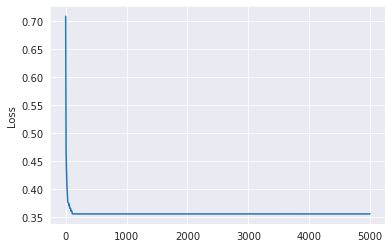

In [47]:
# PLOTING OUT THE LOSSES
plt.plot(range(5000),final_losses)
plt.ylabel('Loss')

In [48]:
# FINDING THE MAX VALUE
prediction = []

with torch.no_grad():
  for i, heart in enumerate(X_test):
    y_pred = model(heart)
    prediction.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

0
1
1
0
1
1
1
0
0
0
1
0
1
0
1
1
1
0
0
0
1
0
1
1
1
1
1
1
0
1
0
0
0
0
1
0
1
1
1
1
1
1
1
1
1
0
0
1
0
0
0
0
1
1
0
0
0
1
0
0
0
1
1
0
1
0
1
1
1
1
1
1
0
1
0
1
0
1
0
0
1
0
1
1
0
0
0
1
1
1
1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [51]:
# FINDING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
cm

array([[34,  7],
       [ 6, 44]])

Text(33.0, 0.5, 'Predicted Value')

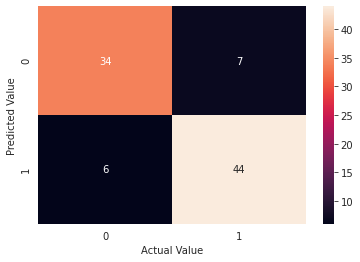

In [52]:
# PLOTTING THE CONFUSIION MATRIX
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [53]:
# SAVING THE MODEL
torch.save(model, "/content/drive/My Drive/Colab Notebooks/Heart Disease With Pytorch/heart_disease.pt")

In [55]:
# CHECKING THE PRECESION & RRECALL SCORE
from sklearn.metrics import precision_score, recall_score
print(f"Precision Score : {precision_score(y_test,prediction)}")
print(f"Recall Score : {recall_score(y_test,prediction)}")

Precision Score : 0.8627450980392157
Recall Score : 0.88
